# Feature Engineering para Precios de Vivienda

### Introducción

En este notebook se implementan las transformaciones identificadas durante el Análisis Exploratorio de Datos (EDA) para preparar los datos para el modelado predictivo. La ingeniería de características (feature engineering) constituye una etapa crítica del proceso donde se realizan las siguientes acciones:

1. **Implementación de estrategias de imputación**: Se aplican los métodos identificados previamente para manejar los valores faltantes en el dataset.

2. **Transformación de variables numéricas**: Se normalizan y transforman las variables cuantitativas según lo determinado en el análisis exploratorio.

3. **Optimización de variables categóricas**: Se procesan las variables cualitativas mediante técnicas de codificación adecuadas para su uso en modelos de machine learning.

4. **Preparación para algoritmos ML**: Se escalan y transforman los datos para cumplir con los requerimientos de los diferentes algoritmos de aprendizaje automático que se implementarán posteriormente.

Este proceso sistemático de transformación busca maximizar la calidad de los datos de entrada para los modelos, preservando al mismo tiempo las relaciones fundamentales entre las variables predictoras y la variable objetivo (`SalePrice`).

# Librerias

In [101]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, PowerTransformer
from sklearn.datasets import make_classification
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from utils_EDA import (analizar_columna_num, RMSE_imputaciones,
                       analizar_columna_cat)

# Datos

In [2]:
data_train = pd.read_csv('../data/train.csv')
data_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


# Feacture Engineering

## Eliminación de Variables

> Tras un análisis exhaustivo, se procedió a eliminar aquellas variables que presentaban más del 20% de datos faltantes o distribuciones problemáticas, como categorías extremadamente desbalanceadas (con más del 95% de los registros concentrados en una sola clase) o patrones uniformes sin capacidad predictiva. Esta decisión **basada en principios de parsimonia y calidad estadística** permitió optimizar el conjunto de datos, eliminando ruido y reduciendo la dimensionalidad sin perder información relevante. 

In [3]:
data_train.shape

(1460, 81)

In [4]:
col_a_eliminar = ['Id', 'Alley', 'Utilities', 'Condition2', 'RoofMatl'
                ,'MasVnrType', 'Heating', 'LowQualFinSF', 'KitchenAbvGr'
                ,'3SsnPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature'
                ,'MiscVal', 'FireplaceQu']

In [5]:
data_train = data_train.drop(columns=col_a_eliminar)

In [6]:
data_train.shape

(1460, 65)

## Categorización de Variables Numéricas Discretas

> En esta sección, se transforman las variables numéricas discretas (como conteos o clasificaciones ordinales) a tipo categórico, ya que por su naturaleza y valores, son más adecuadas como variables categóricas.

In [7]:
data_train.select_dtypes(include=['object'])

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,2Story,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,Inside,Gtl,NWAmes,Norm,1Fam,1Story,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,Inside,Gtl,Crawfor,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,Inside,Gtl,NAmes,Norm,1Fam,1Story,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [8]:
col_a_categorizar = ['MSSubClass', 'OverallQual', 'OverallCond'
                , 'LowQualFinSF','BsmtFullBath','BsmtHalfBath'
                ,'FullBath','HalfBath','BedroomAbvGr'
                ,'KitchenAbvGr','TotRmsAbvGrd','Fireplaces'
                ,'GarageCars','3SsnPorch','ScreenPorch'
                ,'PoolArea','MiscVal','MoSold']

In [9]:
for columna in col_a_categorizar:
    if columna in data_train.columns:
        data_train[columna] = data_train[columna].astype('object')
    else:
        print(f"Advertencia: La columna {columna} no existe en el DataFrame")

Advertencia: La columna LowQualFinSF no existe en el DataFrame
Advertencia: La columna KitchenAbvGr no existe en el DataFrame
Advertencia: La columna 3SsnPorch no existe en el DataFrame
Advertencia: La columna PoolArea no existe en el DataFrame
Advertencia: La columna MiscVal no existe en el DataFrame


In [10]:
data_train.select_dtypes(include=['object'])

,MSSubClass,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,ScreenPorch,MoSold,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,Attchd,RFn,2,TA,TA,Y,0,2,WD,Normal
1,20,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,...,Attchd,RFn,2,TA,TA,Y,0,5,WD,Normal
2,60,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,Attchd,RFn,2,TA,TA,Y,0,9,WD,Normal
3,70,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,...,Detchd,Unf,3,TA,TA,Y,0,2,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,...,Attchd,RFn,3,TA,TA,Y,0,12,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,Reg,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,...,Attchd,RFn,2,TA,TA,Y,0,8,WD,Normal
1456,20,RL,Pave,Reg,Lvl,Inside,Gtl,NWAmes,Norm,1Fam,...,Attchd,Unf,2,TA,TA,Y,0,2,WD,Normal
1457,70,RL,Pave,Reg,Lvl,Inside,Gtl,Crawfor,Norm,1Fam,...,Attchd,RFn,1,TA,TA,Y,0,5,WD,Normal
1458,20,RL,Pave,Reg,Lvl,Inside,Gtl,NAmes,Norm,1Fam,...,Attchd,Unf,1,TA,TA,Y,0,4,WD,Normal


## Imputación de Valores Faltantes

> En esta sección se procederá a realizar la imputación de los datos faltantes en las variables correspondientes.

In [11]:
col_a_imputar = ['LotFrontage', 'GarageType', 'GarageYrBlt', 'GarageFinish', 
                'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure',
                'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea', 'Electrical']

In [12]:
numericas = []
categoricas = []

for col in col_a_imputar:
    if pd.api.types.is_numeric_dtype(data_train[col]):
        numericas.append(col)
    else:
        categoricas.append(col)

print("Variables numéricas:", numericas)
print("Variables categóricas:", categoricas)

Variables numéricas: ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
Variables categóricas: ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'Electrical']


### Variables Numéricas

> Antes de realizar las imputaciones, se procederá a evaluar varios métodos con el fin de comparar su desempeño y seleccionar el más adecuado para cada variable.

#### Variable LotFrontage

In [13]:
data_train['LotFrontage'].isnull().sum(), len(data_train)

(259, 1460)

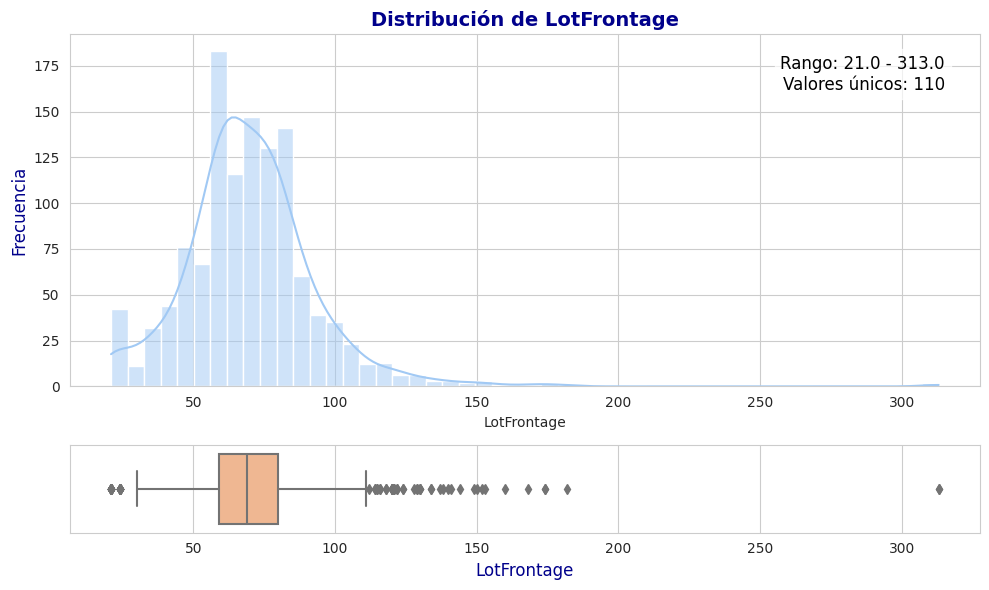

In [14]:
analizar_columna_num('LotFrontage', data_train)

> La variable presenta un **18% de datos faltantes**, sigue una **distribución normal con presencia de outliers**, y muestra **correlaciones moderadas** con otras variables.

**Recomendaciones**:
- **Imputación con mediana (`SimpleImputer`)**: adecuada por la presencia de valores atípicos.
- **Imputación múltiple (`IterativeImputer`, `KNNImputer`)**: recomendada debido a las correlaciones moderadas con otras variables.

In [15]:
RMSE_imputaciones(data_train, 'LotFrontage')

RMSE imputación con Mediana:            21.4596
RMSE imputación con IterativeImputer:   18.2324
RMSE imputación con KNNImputer (k=5): 16.7284


> **se recomienda KNNImputer como el método más adecuado** para imputar los valores faltantes en esta variable.

#### Variable GarageYrBlt

In [16]:
data_train['GarageYrBlt'].isnull().sum(), len(data_train)

(81, 1460)

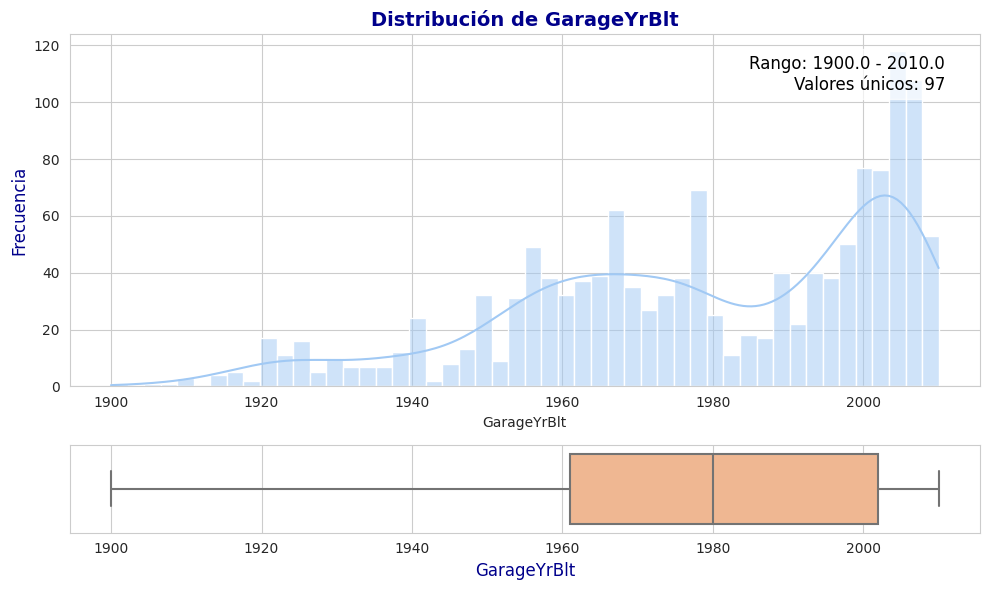

In [17]:
analizar_columna_num('GarageYrBlt', data_train)

> La variable presenta aproximadamente un 6% de datos faltantes, no sigue una distribución normal y muestra una fuerte correlación con la variable `YearBuilt`, la cual no requiere modificaciones. Por lo tanto, **se decide eliminar esta variable para evitar redundancia en la información**.

#### Variable MasVnrArea

In [18]:
data_train['MasVnrArea'].isnull().sum(), len(data_train)

(8, 1460)

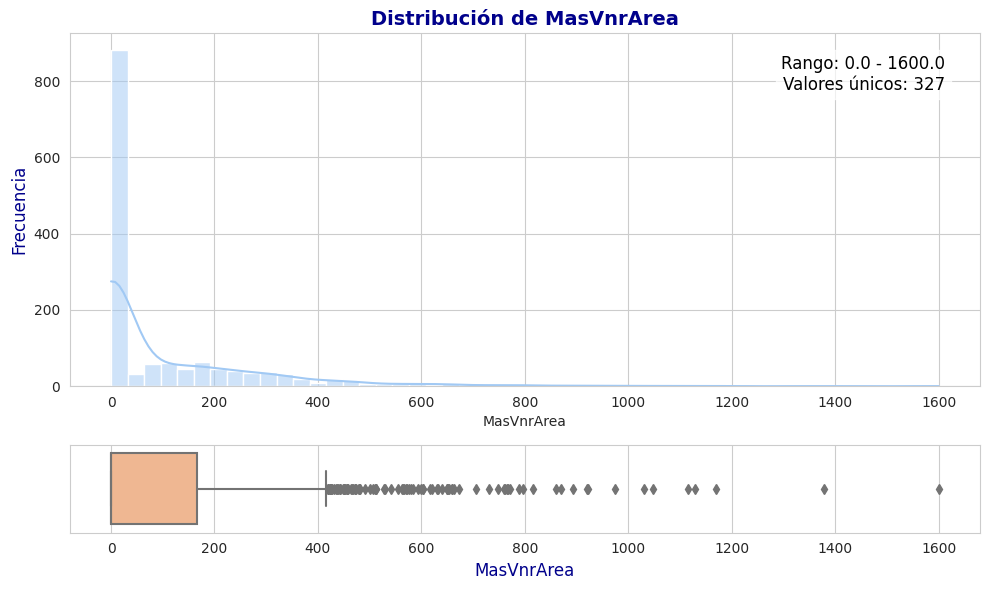

In [19]:
analizar_columna_num('MasVnrArea', data_train)

> La variable presenta aproximadamente un 1% de datos faltantes. Su distribución está **sesgada hacia la derecha**, con un claro pico en los valores bajos que concentra la mayor parte de las observaciones, y presenta múltiples **valores atípicos**. Además, muestra **correlaciones débiles** con otras variables del conjunto de datos.

**Recomendaciones de imputación:**

- **Imputación con la mediana (`SimpleImputer`)**:  
  Es adecuada debido a la presencia de outliers, ya que la mediana es menos sensible a valores extremos que la media, y permite una imputación robusta en distribuciones asimétricas.
  
- **Imputación múltiple (`IterativeImputer`, `KNNImputer`)**:  
  Aunque las correlaciones con otras variables son débiles, estos métodos pueden aprovechar la información disponible para generar estimaciones más precisas que la imputación univariada, especialmente cuando el patrón de faltantes no es completamente aleatorio.


In [20]:
RMSE_imputaciones(data_train, 'MasVnrArea')

RMSE imputación con Mediana:            198.2410
RMSE imputación con IterativeImputer:   167.1480
RMSE imputación con KNNImputer (k=5): 173.6823


> **se recomienda IterativeImputer como el método más adecuado** para imputar los valores faltantes en esta variable.

#### Pipeline para imputación de variables numéricas

In [21]:
# Paso 1: eliminar la columna 
dropper = FunctionTransformer(lambda X: X.drop(columns=['GarageYrBlt']), validate=False)

# Paso 2: imputar con KNNImputer
knn_imputer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5))
])

# Paso 3: imputar con IterativeImputer
iter_imputer = Pipeline(steps=[
    ('imputer', IterativeImputer(random_state=0))
])

# ColumnTransformer para aplicar imputaciones por columna
column_transformer = ColumnTransformer(transformers=[
    ('knn', knn_imputer, ['LotFrontage']),
    ('iter', iter_imputer, ['MasVnrArea'])],
    remainder = 'passthrough', # pasa las demás columnas sin modificar
    verbose_feature_names_out=False).set_output(transform='pandas')

In [22]:
# Pipeline completo
full_pipeline = Pipeline(steps=[
    ('drop', dropper),
    ('imputar', column_transformer)
])
full_pipeline

Pipeline(steps=[('drop',
                 FunctionTransformer(func=<function <lambda> at 0x74c508f3dfc0>)),
                ('imputar',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('knn',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer())]),
                                                  ['LotFrontage']),
                                                 ('iter',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(random_state=0))]),
                                                  ['MasVnrArea'])],
                                   verbose_feature_names_out=False))])

### Variables Categóricas

> Antes de realizar las imputaciones, se procederá a evaluar varios métodos con el fin de comparar su desempeño y seleccionar el más adecuado para cada variable.

In [23]:
categoricas

['GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'Electrical']

#### Variable GarageType, GarageFinish, GarageQual y GarageCond

> Seguidamente, se procedió a analizar los datos faltantes correspondientes a las variables relacionadas con el garaje, aplicando la misma metodología.

In [45]:
print(data_train['GarageType'].isnull().sum(), len(data_train))
print(data_train['GarageFinish'].isnull().sum(), len(data_train))
print(data_train['GarageQual'].isnull().sum(), len(data_train))
print(data_train['GarageCond'].isnull().sum(), len(data_train))

81 1460
81 1460
81 1460
81 1460


In [44]:
idx_nan_GT = data_train[data_train['GarageType'].isnull()].index.to_list()
idx_nan_GF = data_train[data_train['GarageFinish'].isnull()].index.to_list()
idx_nan_GQ = data_train[data_train['GarageQual'].isnull()].index.to_list()
idx_nan_GC = data_train[data_train['GarageCond'].isnull()].index.to_list()
if idx_nan_GT == idx_nan_GF == idx_nan_GQ == idx_nan_GC:
    print("Todos los índices de NaN son iguales.")

Todos los índices de NaN son iguales.


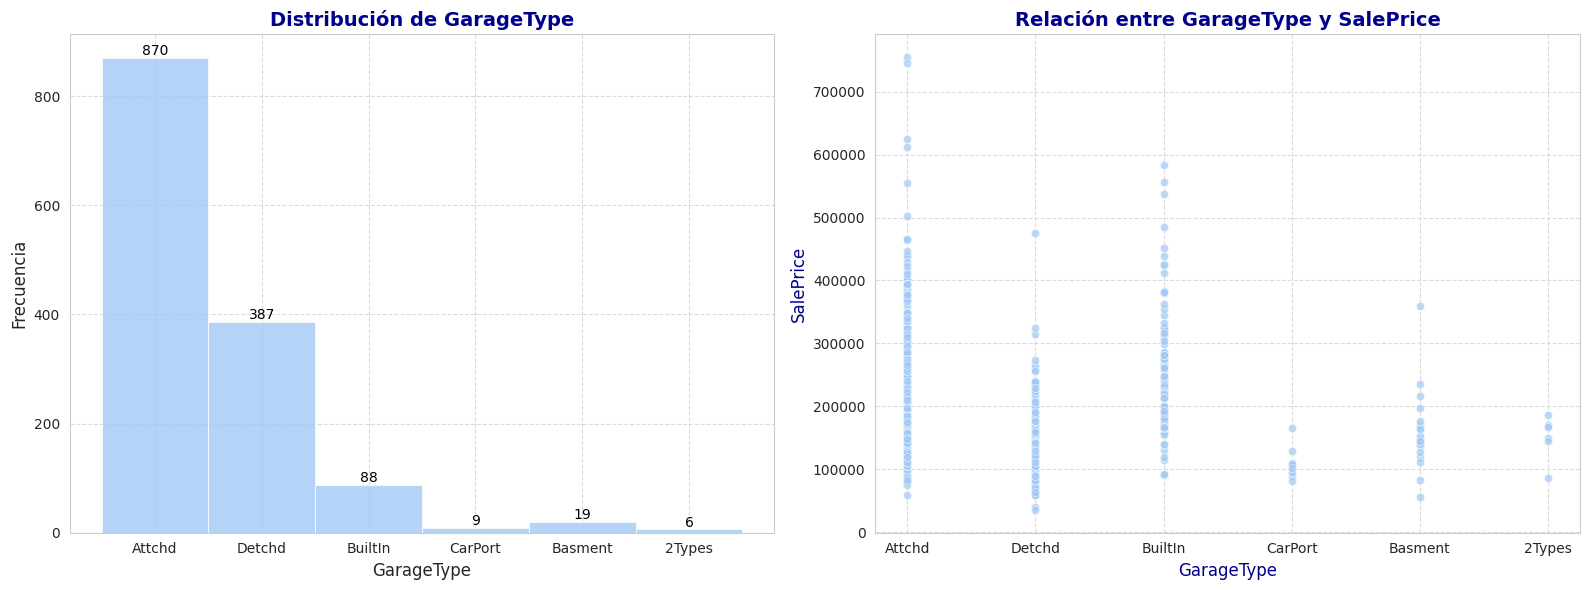

In [25]:
analizar_columna_cat(data_train, data_train,'GarageType')

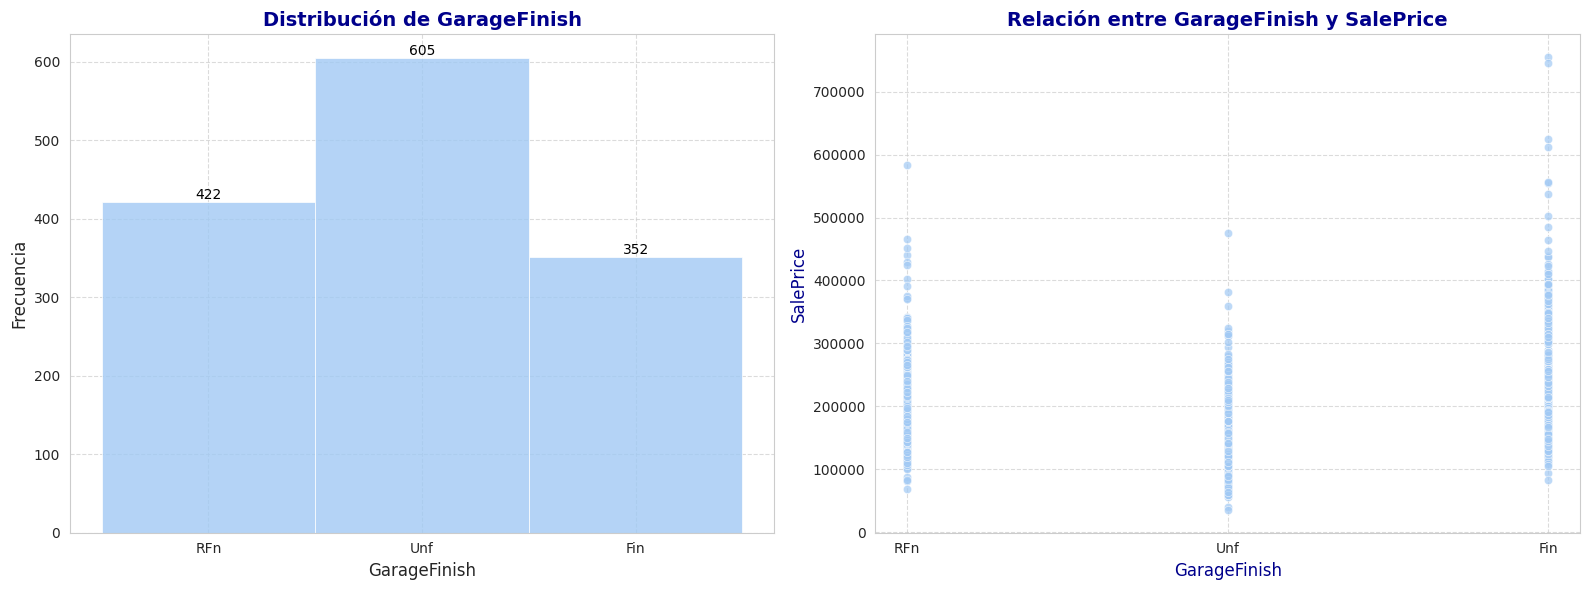

In [27]:
analizar_columna_cat(data_train, data_train,'GarageFinish')

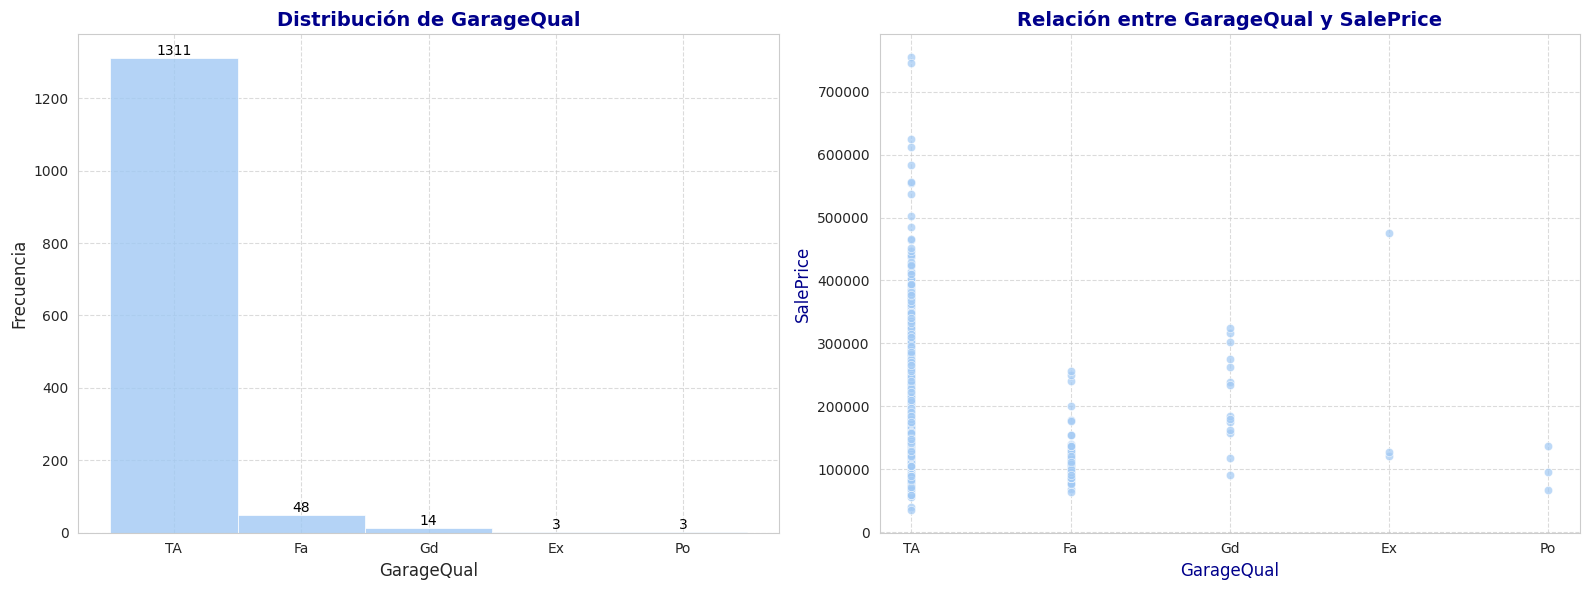

In [29]:
analizar_columna_cat(data_train, data_train,'GarageQual')

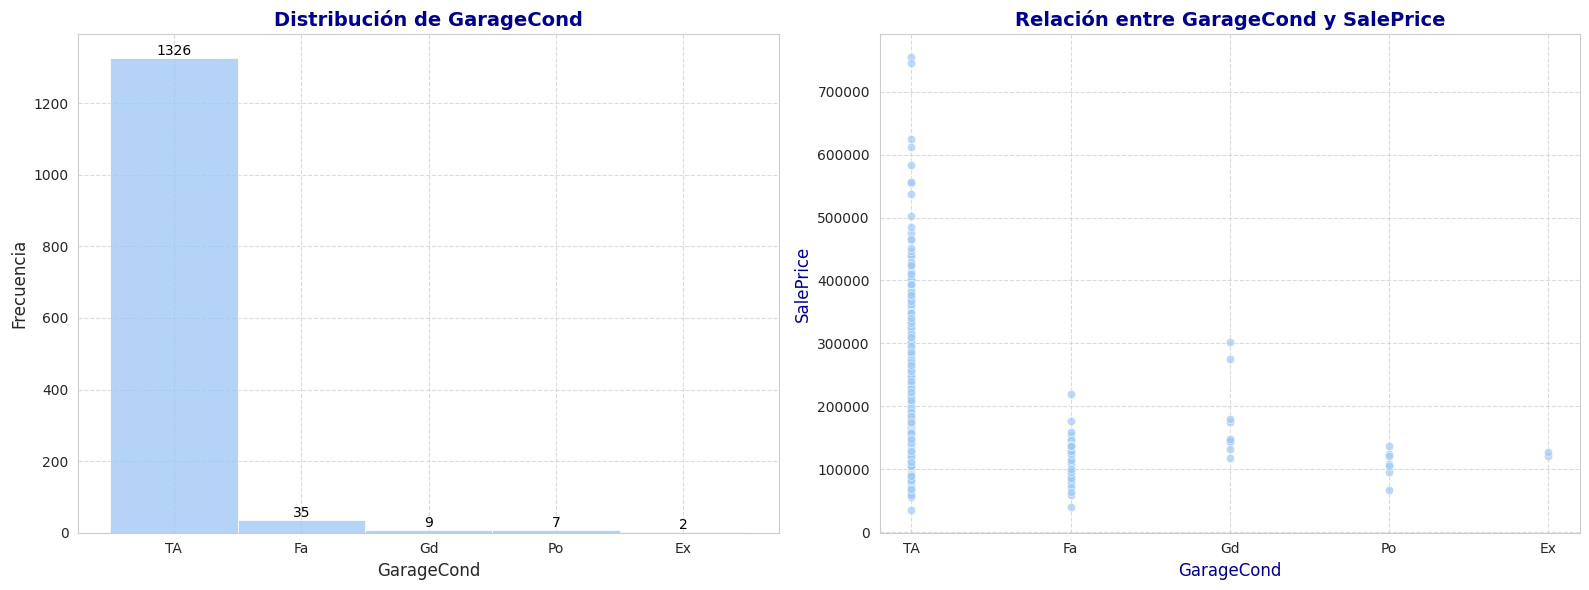

In [31]:
analizar_columna_cat(data_train, data_train,'GarageCond')

> Dado que los valores faltantes en estas variables se deben a que las viviendas no cuentan con garaje, se consideró inapropiado eliminarlos. En su lugar, se introdujo una nueva categoría ('No aplica') para conservar los registros y mantener la integridad de los datos.

#### Variable BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond y BsmtQual

> En la siguiente etapa, se examinarán los valores faltantes correspondientes a las variables del sótano, siguiendo el mismo procedimiento metodológico implementado previamente.

In [73]:
print(data_train['BsmtFinType2'].isnull().sum(), len(data_train))
print(data_train['BsmtExposure'].isnull().sum(), len(data_train))
print(data_train['BsmtFinType1'].isnull().sum(), len(data_train))
print(data_train['BsmtCond'].isnull().sum(), len(data_train))
print(data_train['BsmtQual'].isnull().sum(), len(data_train))

38 1460
38 1460
37 1460
37 1460
37 1460


In [80]:
idx_nan_BFT2 = data_train[data_train['BsmtFinType2'].isnull()].index.to_list()
idx_nan_BE = data_train[data_train['BsmtExposure'].isnull()].index.to_list()

In [81]:
if idx_nan_BFT2 == idx_nan_BE:
    print("Todos los índices de NaN son iguales.")

In [71]:
idx_nan_BFT1 = data_train[data_train['BsmtFinType1'].isnull()].index.to_list()
idx_nan_BC = data_train[data_train['BsmtCond'].isnull()].index.to_list()
idx_nan_BQ = data_train[data_train['BsmtQual'].isnull()].index.to_list()

In [72]:
if idx_nan_BFT1 == idx_nan_BC == idx_nan_BQ:
    print("Todos los índices de NaN son iguales.")

Todos los índices de NaN son iguales.


In [76]:
extra = list(set(idx_nan_BFT2) - set(idx_nan_BFT1))
print("Elemento extra:", extra)

Elemento extra: [332]


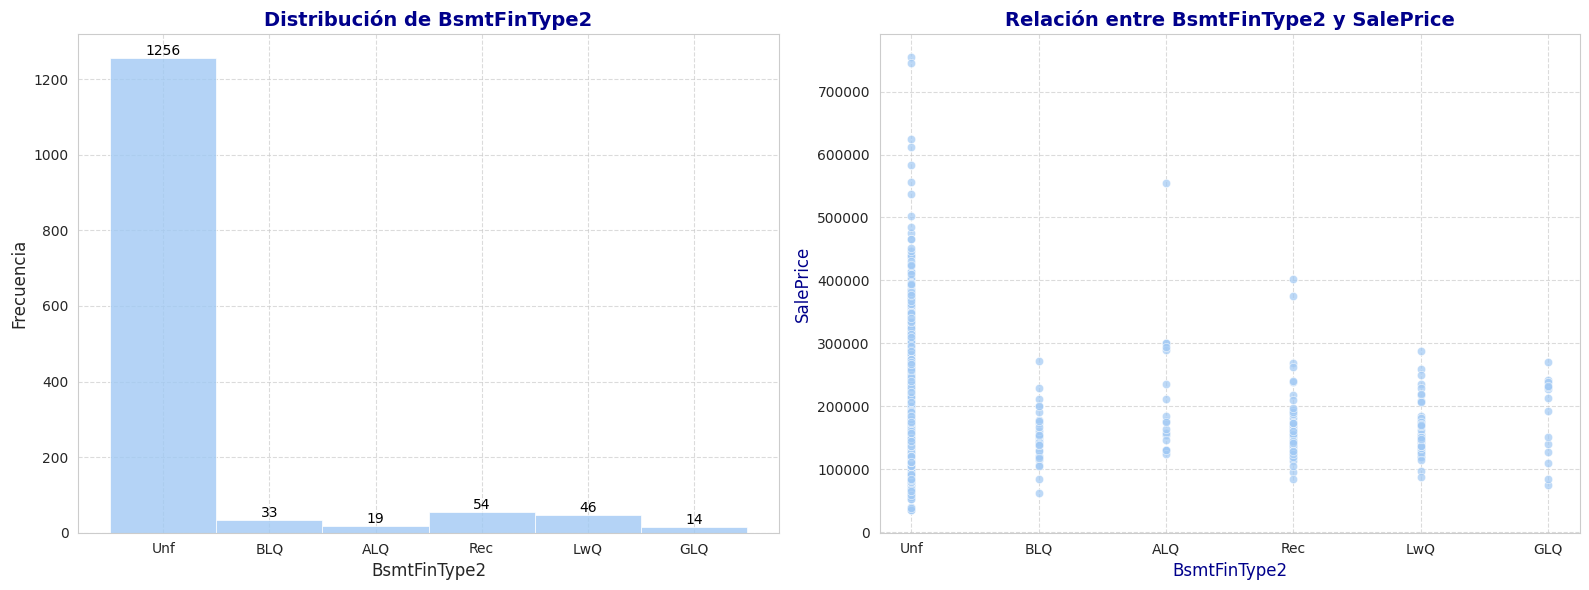

In [51]:
analizar_columna_cat(data_train, data_train,'BsmtFinType2')

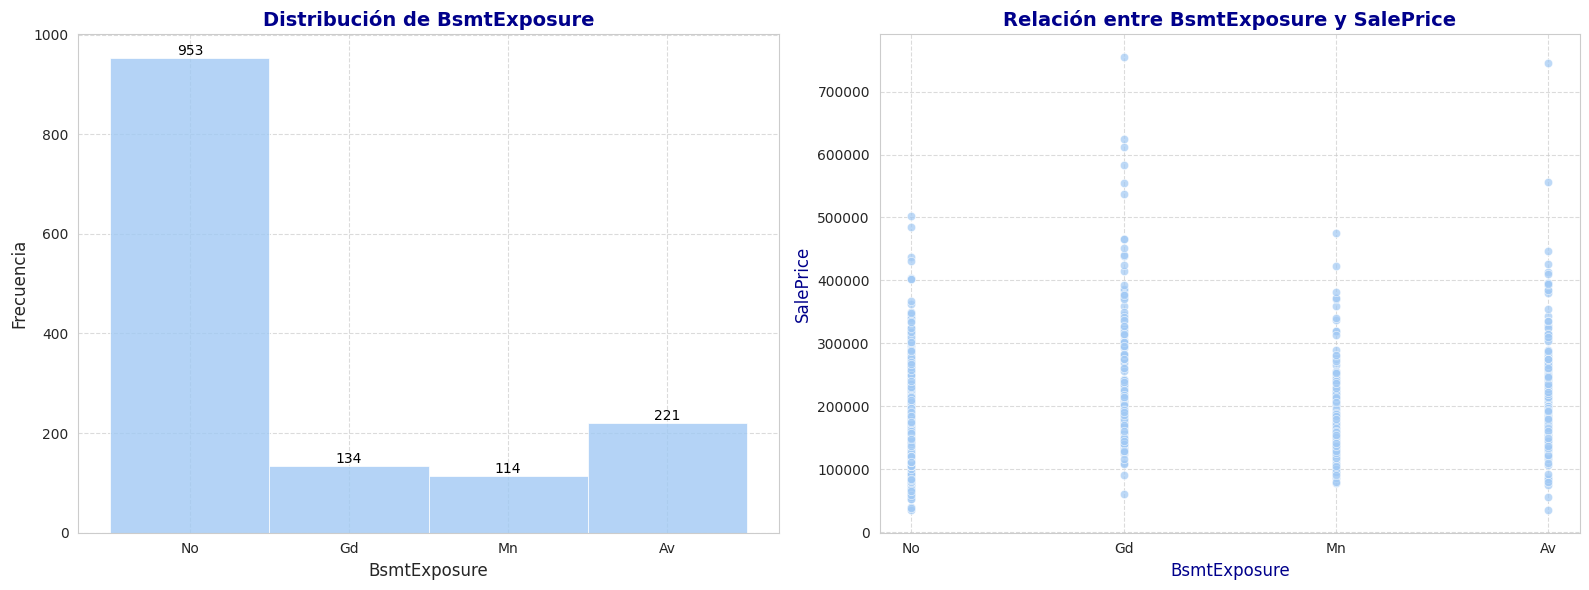

In [53]:
analizar_columna_cat(data_train, data_train,'BsmtExposure')

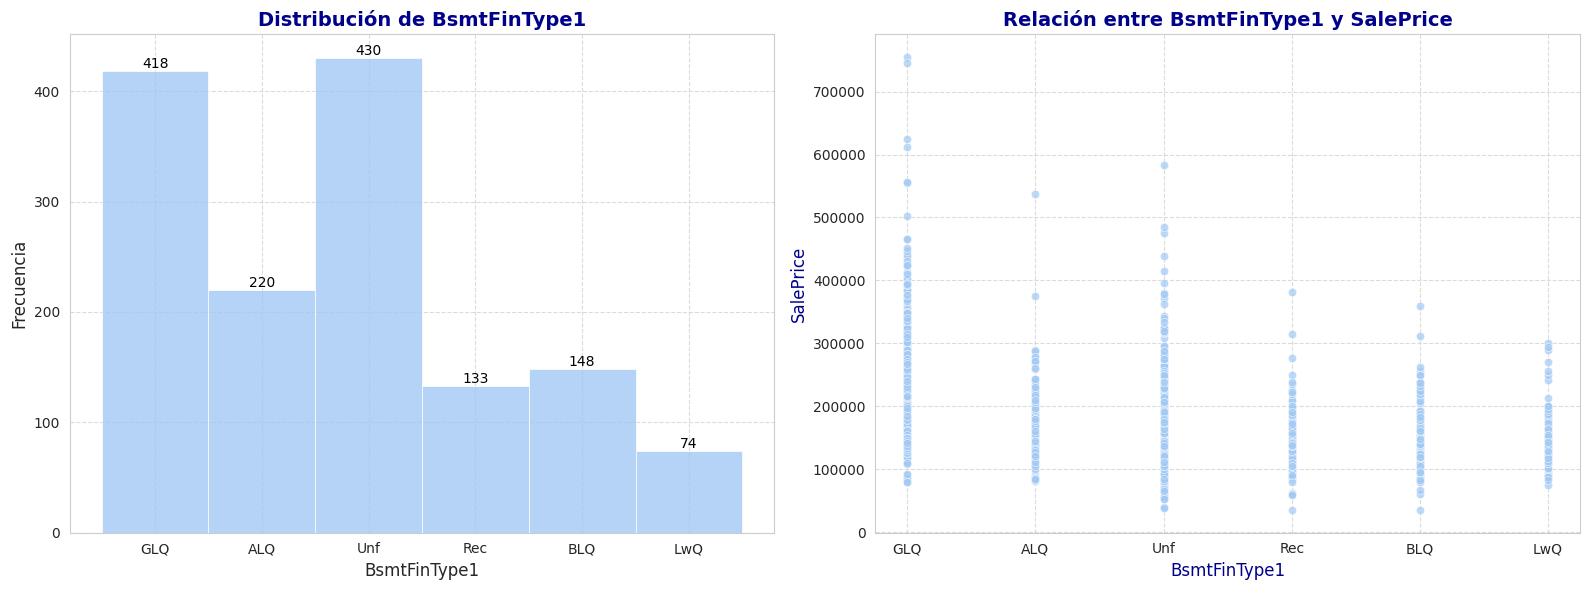

In [56]:
analizar_columna_cat(data_train, data_train,'BsmtFinType1')

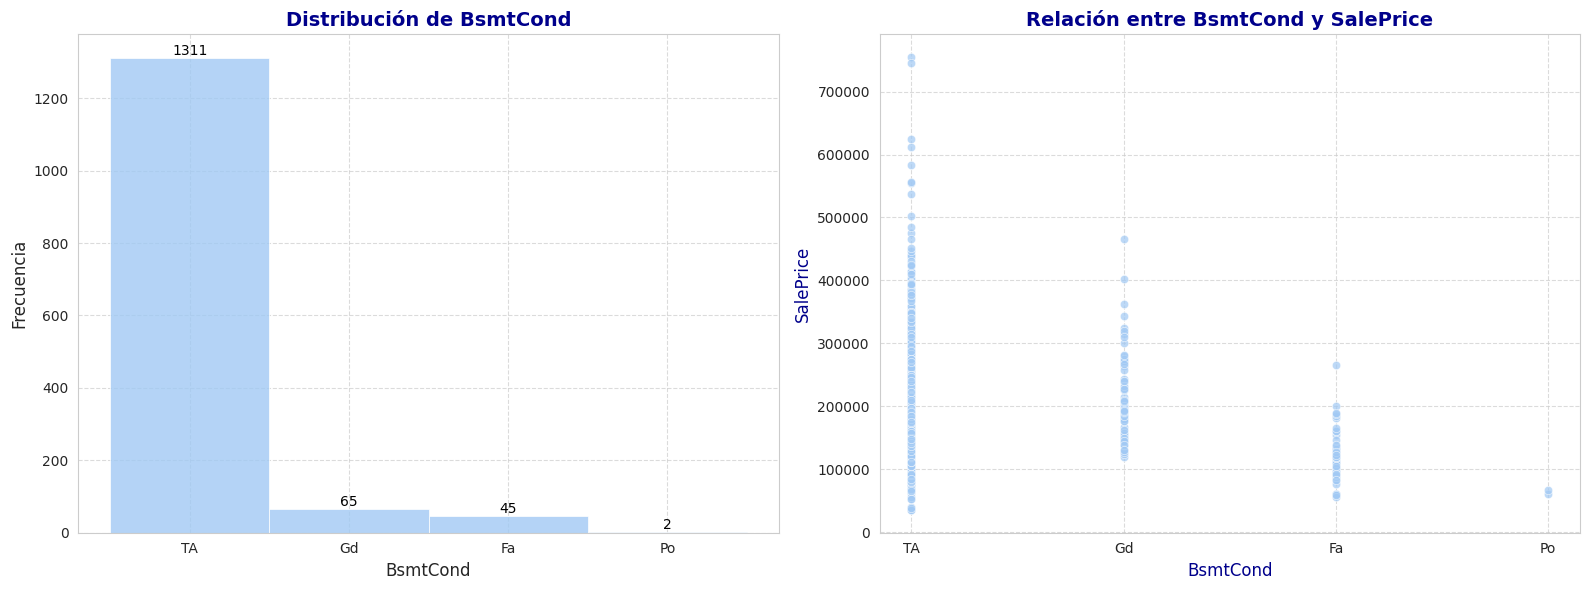

In [58]:
analizar_columna_cat(data_train, data_train,'BsmtCond')

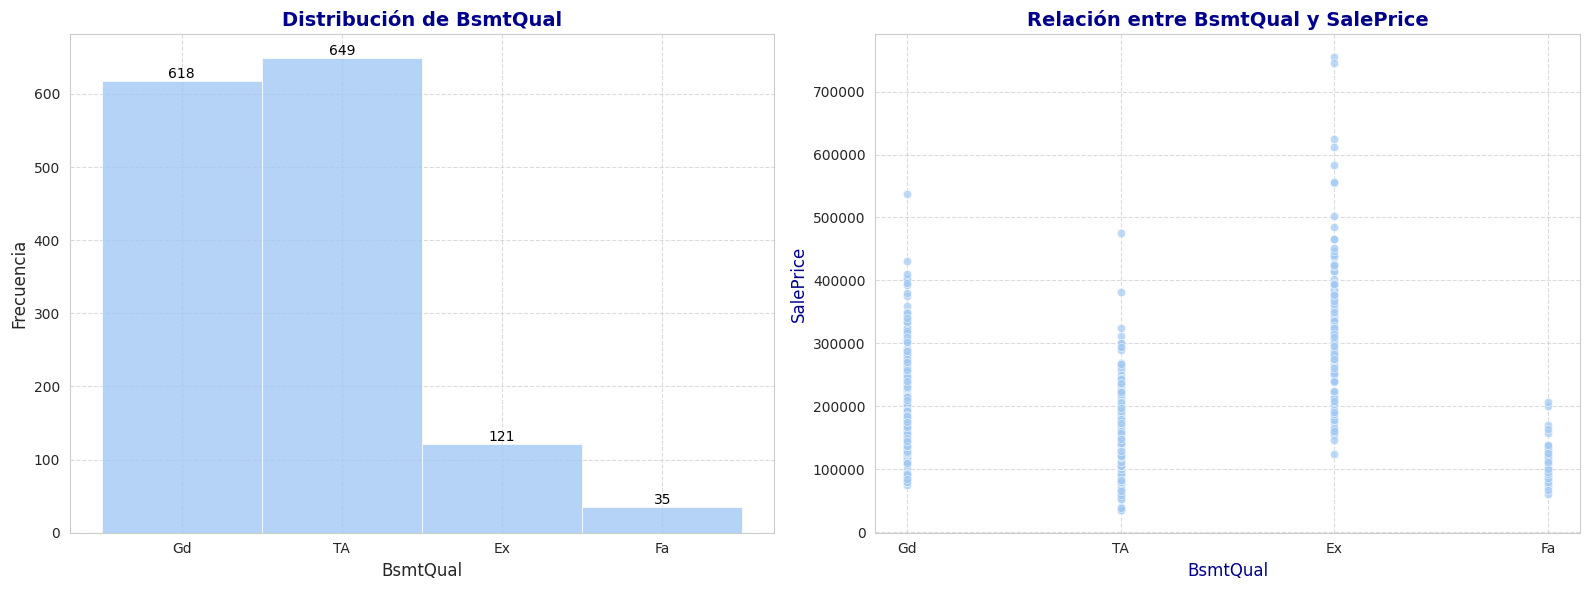

In [60]:
analizar_columna_cat(data_train, data_train,'BsmtQual')

> En las variables relacionadas con el sótano, los valores NaN identificados corresponden a casos donde esta característica no es aplicable. Por ello, **se reemplazarán estos valores por la categoría 'No aplica'** para garantizar la correcta preparación de los datos para el proceso de entrenamiento del modelo.

#### Variable Electrical

In [83]:
data_train['Electrical'].isnull().sum(), len(data_train)

(1, 1460)

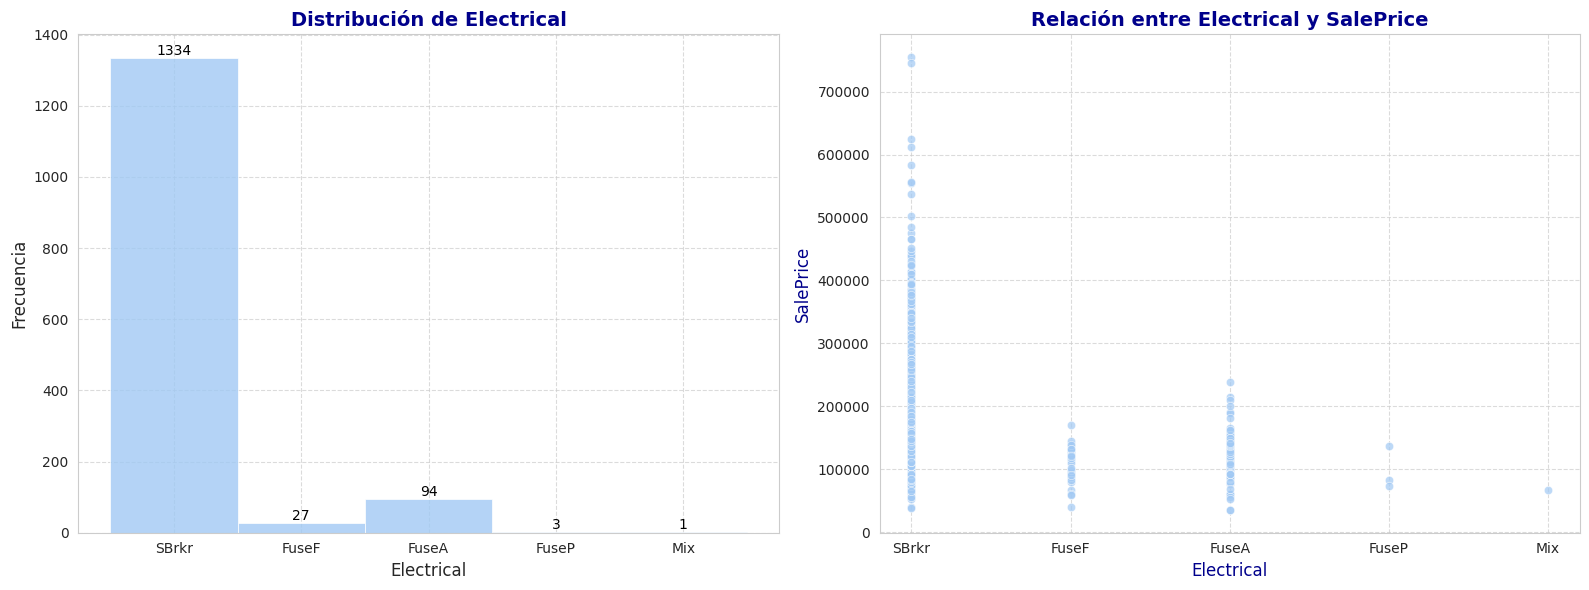

In [84]:
analizar_columna_cat(data_train, data_train,'Electrical')

> Para la variable 'Electrical', dado que solo presenta un dato faltante, se utilizará el método SimpleImputer aplicando la moda como estrategia de imputación.

#### Pipeline para imputación de variables categóricas

In [87]:
# Función para reemplazar NaNs por "No aplica"
def reemplazar_nan_por_no_aplica(X, columnas):
    X = pd.DataFrame(X).copy()  
    X[columnas] = X[columnas].fillna('No aplica')
    return X  

# Columnas categóricas a reemplazar con "No aplica"
columnas_categoricas = ['GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
                        'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1',
                        'BsmtCond', 'BsmtQual']

# Transformer personalizado para reemplazo de NaN por "No aplica"
transformador_reemplazo = FunctionTransformer(
    func=lambda X: reemplazar_nan_por_no_aplica(X, columnas_categoricas),
    validate=False
)

# Pipeline para imputar 'Electrical' con moda
cat_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# ColumnTransformer correctamente estructurado
column_transformer_cat = ColumnTransformer(transformers=[
    ('cat_imputer', cat_imputer, ['Electrical']),
    ('remp_nan', transformador_reemplazo, columnas_categoricas)
], remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')


In [88]:
column_transformer_cat

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Electrical']),
                                ('remp_nan',
                                 FunctionTransformer(func=<function <lambda> at 0x74c5049a6dd0>),
                                 ['GarageCond', 'GarageFinish', 'GarageQual',
                                  'GarageType', 'BsmtFinType2', 'BsmtExposure',
                                  'BsmtFinType1', 'BsmtCond', 'BsmtQual'])],
                  verbose_feature_names_out=False)

## Transformación de Variables Numéricas

> A continuación, se procederá a realizar las transformaciones correspondientes a las variables numéricas identificadas en el Análisis Exploratorio de Datos (EDA).

In [94]:
# Transformaciones personalizadas
log_transformer = FunctionTransformer(lambda x: np.log1p(x))  # log(1 + x), seguro para ceros
sqrt_transformer = FunctionTransformer(lambda x: np.sqrt(x))
cbrt_transformer = FunctionTransformer(lambda x: np.cbrt(x))  # raíz cúbica
boxcox_transformer = PowerTransformer(method='box-cox', standardize=False)

# Columnas según la transformación recomendada
cols_log = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
            '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF']
cols_cbrt = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', 'EnclosedPorch']
cols_sqrt = ['TotalBsmtSF', 'GarageArea']
cols_boxcox = ['LotArea', 'BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', '2ndFlrSF',
               'GrLivArea', 'WoodDeckSF', 'OpenPorchSF', 'GarageArea', 'EnclosedPorch']

# Para evitar columnas duplicadas en múltiples transformaciones, priorizaremos una única por variable.
# Aquí seleccionamos la primera transformación recomendada como la principal:
log_only = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
            '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF']
sqrt_only = ['TotalBsmtSF', 'GarageArea']
boxcox_only = ['EnclosedPorch']

# ColumnTransformer con transformaciones
num_transformer = ColumnTransformer(transformers=[
    ('log', log_transformer, log_only),
    ('sqrt', sqrt_transformer, sqrt_only),
    ('boxcox', boxcox_transformer, boxcox_only)
], remainder='passthrough', verbose_feature_names_out=False)

In [95]:
num_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('log',
                                 FunctionTransformer(func=<function <lambda> at 0x74c5022b9240>),
                                 ['LotFrontage', 'LotArea', 'MasVnrArea',
                                  'BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF',
                                  '2ndFlrSF', 'GrLivArea', 'WoodDeckSF',
                                  'OpenPorchSF']),
                                ('sqrt',
                                 FunctionTransformer(func=<function <lambda> at 0x74c5022b9090>),
                                 ['TotalBsmtSF', 'GarageArea']),
                                ('boxcox',
                                 PowerTransformer(method='box-cox',
                                                  standardize=False),
                                 ['EnclosedPorch'])],
                  verbose_feature_names_out=False)

# Resumen 

> A continuación, se procederá a integrar todas las transformaciones del conjunto de datos en un único pipeline.

In [120]:
# Paso 0: eliminar columna innecesaria
dropper = FunctionTransformer(lambda X: X.drop(columns=['GarageYrBlt']), validate=False)

# Columnas categóricas a reemplazar con "No aplica"
columnas_categoricas = ['GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
                        'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1',
                        'BsmtCond', 'BsmtQual']

def reemplazar_nan_por_no_aplica(X, columnas):
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X, columns=columnas)
    else:
        X = X.copy()
    X[columnas] = X[columnas].fillna('No aplica')
    return X
transformador_reemplazo = FunctionTransformer(
    func=lambda X: reemplazar_nan_por_no_aplica(X, columnas_categoricas),
    validate=False
)

# === PASO 1: Pipeline de imputaciones ===
imputaciones_column_transformer = ColumnTransformer(transformers=[
    ('knn_imputer', KNNImputer(n_neighbors=5), ['LotFrontage']),
    ('iter_imputer', IterativeImputer(random_state=0), ['MasVnrArea']),
    ('cat_imputer', SimpleImputer(strategy='most_frequent'), ['Electrical']),
    ('reemplazo_nan', transformador_reemplazo, columnas_categoricas)
], remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')

# === PASO 2: Pipeline de transformaciones ===

# Transformaciones matemáticas
log_transformer = FunctionTransformer(lambda x: np.log1p(x))
sqrt_transformer = FunctionTransformer(lambda x: np.sqrt(x))

log_only = ['LotArea', 'BsmtFinSF1', 'BsmtFinSF2',
            '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF']
sqrt_only = ['TotalBsmtSF', 'GarageArea', 'EnclosedPorch']

transformaciones_column_transformer = ColumnTransformer(transformers=[
    ('log_transform', log_transformer, log_only),
    ('sqrt_transform', sqrt_transformer, sqrt_only)
], remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')

# === PASO 3: Escalado y codificación ===
post_transformer = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), make_column_selector(dtype_include=np.number)),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), 
     make_column_selector(dtype_include='object'))
], remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')

# === PIPELINE FINAL ===
full_pipeline = Pipeline(steps=[
    ('drop_column', dropper),
    ('imputaciones', imputaciones_column_transformer),
    ('transformaciones', transformaciones_column_transformer),
    ('escalar_y_codificar', post_transformer)
])


In [121]:
full_pipeline

Pipeline(steps=[('drop_column',
                 FunctionTransformer(func=<function <lambda> at 0x74c5091671c0>)),
                ('imputaciones',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('knn_imputer', KNNImputer(),
                                                  ['LotFrontage']),
                                                 ('iter_imputer',
                                                  IterativeImputer(random_state=0),
                                                  ['MasVnrArea']),
                                                 ('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Electrical']),
                                                 ('re...
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x74c500c05c90>),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x74c500c05db0>)],
                                   verbose_feature_names_out=False))])

In [122]:
X_transformado = full_pipeline.fit_transform(data_train)

In [123]:
X_transformado

,LotArea,BsmtFinSF1,BsmtFinSF2,1stFlrSF,2ndFlrSF,GrLivArea,WoodDeckSF,OpenPorchSF,TotalBsmtSF,GarageArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.133270,0.779431,-0.355342,-0.803645,1.180528,0.529194,-0.946701,0.845209,-0.303511,0.409808,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.113413,0.888257,-0.355342,0.418479,-0.870117,-0.381965,1.249540,-1.072916,0.510631,0.104002,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.420049,0.654803,-0.355342,-0.576677,1.184762,0.659631,-0.946701,0.675137,-0.163988,0.604387,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.103317,0.384539,-0.355342,-0.439421,1.143550,0.541448,-0.946701,0.592558,-0.532408,0.710396,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.878431,0.754400,-0.355342,0.112127,1.244087,1.282295,1.080884,0.991848,0.291507,1.267818,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.259231,-1.414140,-0.355342,-0.465737,1.117594,0.416598,-0.946701,0.653002,-0.093944,0.104002,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,0.725429,0.816966,2.409693,1.981524,-0.870117,1.106648,1.310217,-1.072916,0.996956,0.246332,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,-0.002359,0.464947,-0.355342,0.228208,1.271356,1.470102,-0.946701,0.837652,0.304923,-0.764739,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,0.136833,-0.106220,3.405917,-0.077721,-0.870117,-0.854536,1.328490,-1.072916,0.160960,-0.824375,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
